In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

%matplotlib inline
plt.rc('font', family='Times New Roman')

In [2]:
def load_scores(file):
    target = []
    nontarget = []
    with open(file, 'r') as f:
        for l in f.readlines():
            score, truth = l.split()
            try:
                score = float(score)
            except Exception as e:
                tmp = score
                score = float(truth)
                truth = tmp
                
            if truth == 'True':
                target.append(score)
            else:
                nontarget.append(score)
                
    return np.array(target).astype(np.float32),np.array(nontarget).astype(np.float32)

In [3]:
current_dir = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/'

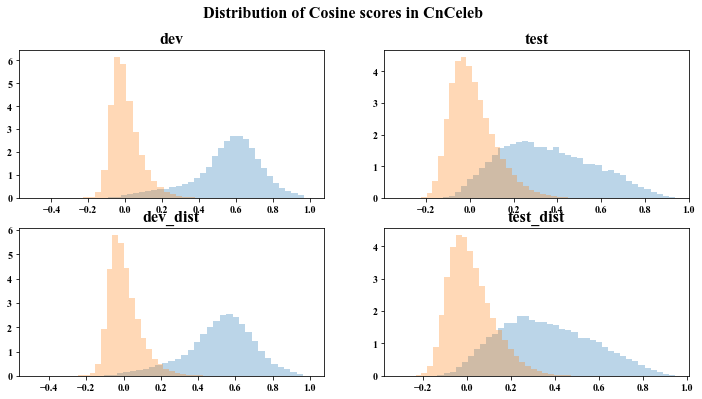

In [9]:
plt.figure(figsize=(12, 6))


cn_test = current_dir + 'Data/xvector/TDNN_v5/cnceleb/klfb_egs_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/test/epoch_50/scores'
cn_dev = current_dir + 'Data/xvectorData/checkpoint/TDNN_v5/cnceleb/klfb_egs_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/cnceleb_epoch50_fix/score.2021.11.26.20:42:54'

cn_dev_dist = current_dir + 'Data/xvector/TDNN_v5/cnceleb/klfb_egs_baseline/arcdist/Mean_STAP_em512_lr1_wd5e4_var/cnceleb_dev_epoch50_fix/score.2021.11.29.12:56:18'
cn_test_dist = current_dir + 'Data/xvector/TDNN_v5/cnceleb/klfb_egs_baseline/arcdist/Mean_STAP_em512_lr1_wd5e4_var/test/epoch_50/scores'

plt.suptitle('Distribution of Cosine scores in CnCeleb', fontsize=16)

axes1 = plt.subplot(221)
plt.title('dev', fontsize=16)
target,nontarget = load_scores(cn_dev)
axes1.hist(target, bins=40, density=True, alpha=0.3)
axes1.hist(nontarget, bins=40, density=True, alpha=0.3)

axes2 = plt.subplot(222)
plt.title('test', fontsize=16)
target,nontarget = load_scores(cn_test)
n, bins, patches = axes2.hist(target, bins=40, density=True, alpha=0.3)
n, bins, patches = axes2.hist(nontarget, bins=40, density=True, alpha=0.3)

axes1 = plt.subplot(223)
plt.title('dev_dist', fontsize=16)
target,nontarget = load_scores(cn_dev_dist)
axes1.hist(target, bins=40, density=True, alpha=0.3)
axes1.hist(nontarget, bins=40, density=True, alpha=0.3)

axes2 = plt.subplot(224)
plt.title('test_dist', fontsize=16)
target,nontarget = load_scores(cn_test_dist)
n, bins, patches = axes2.hist(target, bins=40, density=True, alpha=0.3)
n, bins, patches = axes2.hist(nontarget, bins=40, density=True, alpha=0.3)

In [16]:
target,nontarget = load_scores(cn_dev)
print('                 target            nontarget  ')
print('             mean      std |     mean      std')
print('dev')
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))
target,nontarget = load_scores(cn_dev_dist)
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))

print('\ntest')
target,nontarget = load_scores(cn_test)
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))
target,nontarget = load_scores(cn_test_dist)
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))

                 target            nontarget  
             mean      std |     mean      std
dev
           0.5535   0.1843 |   0.0034   0.0801
           0.5184   0.1809 |   0.0047   0.0834

test
           0.3526   0.2116 |   0.0144   0.1011
           0.3608   0.2105 |   0.0202   0.1030


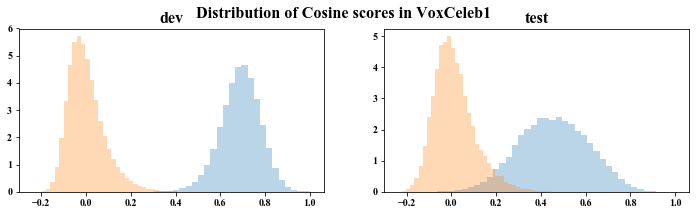

In [51]:
plt.figure(figsize=(12, 3))

vox1_dev = current_dir + 'Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_dev_epoch_50_var/score.2021.11.26.21:13:16'
vox1_test = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_50_var/score.2021.11.04.15:30:06'


plt.suptitle('Distribution of Cosine scores in VoxCeleb1', fontsize=16)

axes1 = plt.subplot(121)
plt.title('dev', fontsize=16)
target,nontarget = load_scores(vox1_dev)
# axes1.set_xlim(0, 0.4)

axes1.hist(target, bins=40, density=True, alpha=0.3)
axes1.hist(nontarget, bins=40, density=True, alpha=0.3)


axes2 = plt.subplot(122)

plt.title('test', fontsize=16)
target,nontarget = load_scores(vox1_test)
n, bins, patches = axes2.hist(target, bins=40, density=True, alpha=0.3)
n, bins, patches = axes2.hist(nontarget, bins=40, density=True, alpha=0.3)

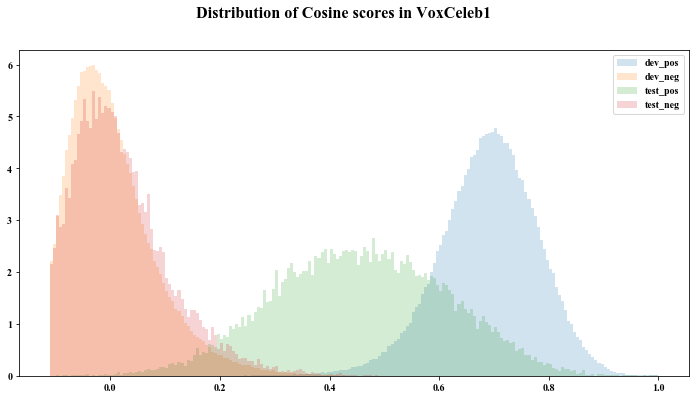

In [7]:
plt.figure(figsize=(12, 6))
bins=200
alpha=0.2
vox1_dev = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_dev_epoch_45_var/score.2021.11.30.17:53:28'
vox1_test = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_45_var/score.2021.11.30.17:14:12'
# vox1_test = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_50_var/score.2021.11.04.15:30:06'

vox1_dev_min = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/minarcsoft_sgd_rop/inputMean_STAP_em512_wd5e4_var/vox1_dev_epoch_70_var/score.2021.11.30.17:35:05'
vox1_test_min = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/minarcsoft_sgd_rop/inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_70_var/score.2021.11.30.17:18:02'


plt.suptitle('Distribution of Cosine scores in VoxCeleb1', fontsize=16)

target,nontarget = load_scores(vox1_dev)
# axes1.set_xlim(0, 0.4)

n, bins, patches = plt.hist(target, bins=bins, density=True, alpha=alpha)
n, bins, patches = plt.hist(nontarget, bins=bins, density=True, alpha=alpha)

target,nontarget = load_scores(vox1_test)
n, bins, patches = plt.hist(target, bins=bins, density=True, alpha=alpha)
n, bins, patches = plt.hist(nontarget, bins=bins, density=True, alpha=alpha)

plt.legend(['dev_pos', 'dev_neg', 'test_pos', 'test_neg'])

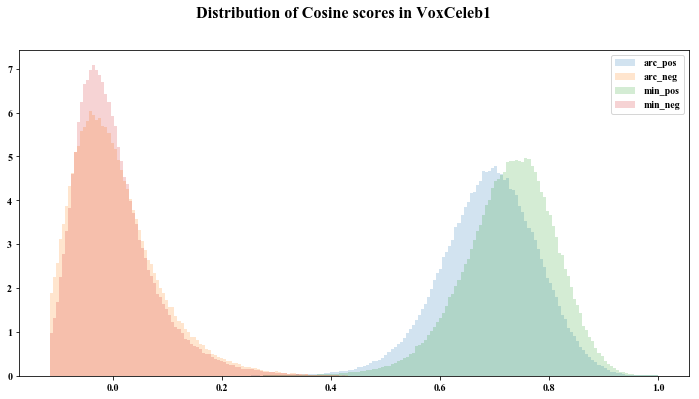

In [23]:
plt.figure(figsize=(12, 6))
bins=200
alpha=0.2
vox1_dev = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_dev_epoch_45_var/score.2021.11.30.17:53:28'
vox1_test = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_45_var/score.2021.11.30.17:14:12'
# vox1_test = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_50_var/score.2021.11.04.15:30:06'

vox1_dev_min = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/minarcsoft_sgd_rop/inputMean_STAP_em512_wd5e4_var/vox1_dev_epoch_70_var/score.2021.11.30.17:35:05'
vox1_test_min = current_dir + '/Data/xvector/TDNN_v5/vox1/klfb_egs_baseline/minarcsoft_sgd_rop/inputMean_STAP_em512_wd5e4_var/vox1_test_epoch_70_var/score.2021.11.30.17:18:02'


plt.suptitle('Distribution of Cosine scores in VoxCeleb1', fontsize=16)

target,nontarget = load_scores(vox1_dev)
# plt.ylim(0, 1)
# plt.xlim(0.2, 0.4)

n, bins, patches = plt.hist(target, bins=bins, density=True, alpha=alpha)
n, bins, patches = plt.hist(nontarget, bins=bins, density=True, alpha=alpha)

target,nontarget = load_scores(vox1_dev_min)
n, bins, patches = plt.hist(target, bins=bins, density=True, alpha=alpha)
n, bins, patches = plt.hist(nontarget, bins=bins, density=True, alpha=alpha)

plt.legend(['arc_pos', 'arc_neg', 'min_pos', 'min_neg'])

In [24]:
target,nontarget = load_scores(vox1_dev)
print('                 target            nontarget  ')
print('             mean      std |     mean      std')
print('dev')
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))
target,nontarget = load_scores(vox1_dev_min)
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))

print('\ntest')
target,nontarget = load_scores(vox1_test)
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))
target,nontarget = load_scores(vox1_test_min)
print('           %.4f   %.4f |   %.4f   %.4f'%(np.mean(target), np.std(target), np.mean(nontarget), np.std(nontarget)))

                 target            nontarget  
             mean      std |     mean      std
dev
           0.6888   0.0902 |   0.0010   0.0814
           0.7253   0.0870 |   0.0008   0.0738

test
           0.4569   0.1557 |   0.0139   0.0922
           0.4459   0.1575 |   0.0159   0.0896


In [58]:
target,nontarget = load_scores(vox1_dev)
print('std: \ntarget: ', np.std(target))
print('nontarget: ', np.std(nontarget))

target,nontarget = load_scores(vox1_test)
print('std: \ntarget: ', np.std(target))
print('nontarget: ', np.std(nontarget))

std: 
target:  0.08996952
nontarget:  0.08127117
std: 
target:  0.15568481
nontarget:  0.092248686


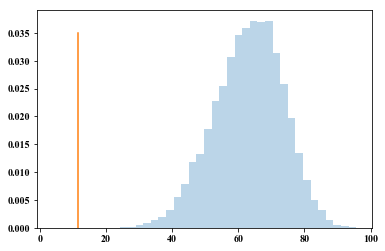

In [27]:
n, bins, patches = plt.hist(np.arccos(target)*180/np.pi, bins=40, density=True, alpha=0.3)
plt.plot([0.2*180/np.pi, 0.2*180/np.pi,], [0, 0.035])

In [26]:
0.2*180/np.pi

11.459155902616464

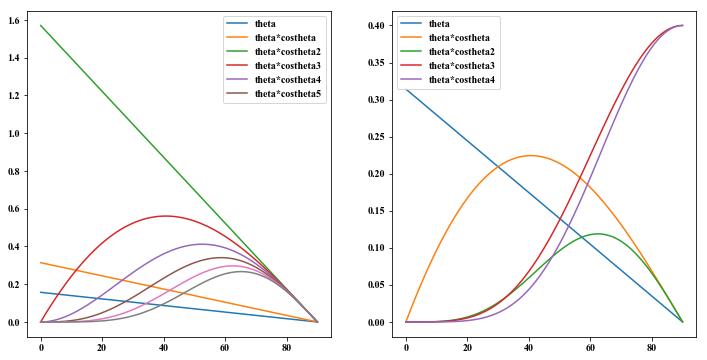

In [61]:
plt.figure(figsize=(12, 6))

x = torch.arange(0,91).float()
xr = x.__reversed__()
xr =xr / 90 *np.pi*0.5

alpha = 0.4
plt.subplot(121)
plt.plot(0.1* xr)
plt.plot(0.2* xr)

plt.plot(xr)
plt.plot(xr*xr.cos())
# plt.plot(0.4*xr*xr.cos()**2)
plt.plot(xr*xr.cos()**2)
plt.plot(xr*xr.cos()**3)
plt.plot(xr*xr.cos()**4)
plt.plot(xr*xr.cos()**5)

plt.legend(['theta', 'theta*costheta', 'theta*costheta2', 'theta*costheta3','theta*costheta4', 'theta*costheta5'])

plt.subplot(122)
# plt.plot(alpha*xr)
# plt.plot(alpha*xr*xr.cos())
# plt.plot(0.4*xr*xr.cos()**2)
# plt.plot(alpha*xr*xr.cos()**2)
# plt.plot(alpha*xr*xr.cos()**3)
plt.plot(0.2 * xr)
plt.plot(alpha*xr*xr.cos())
plt.plot(alpha*xr*xr.cos()**4)
plt.plot(alpha*xr.cos()**4)
plt.plot(alpha*xr.cos()**5)


plt.legend(['theta', 'theta*costheta', 'theta*costheta2', 'theta*costheta3','theta*costheta4'])


In [54]:
(alpha*xr.cos()**4)[40]

tensor(0.0683)

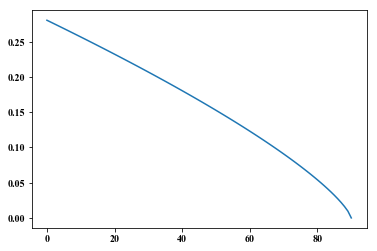

In [69]:
# plt.plot(xr)
# plt.plot(0.2*xr)
plt.plot(0.2*xr**0.75)
